In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")

In [5]:
print("First row for airlines:")
print(airlines.iloc[0])
print("\n")
print("First row for airports:")
print(airports.iloc[0])
print("\n")
print("First row for routes:")
print(routes.iloc[0])

First row for airlines:
id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object


First row for airports:
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object


First row for routes:
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


In [7]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

**Creating Basemap class to transform data into cartesian coordinates**

In [48]:
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)

In [49]:
longitude = airports["longitude"].tolist()
latitude = airports["latitude"].tolist()

**Converting 2-list objects into two separate variables: x, y**

In [50]:
x, y = m(longitude, latitude)

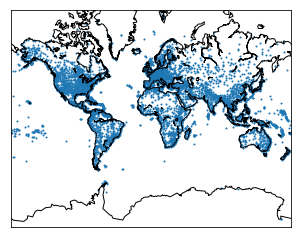

In [51]:
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

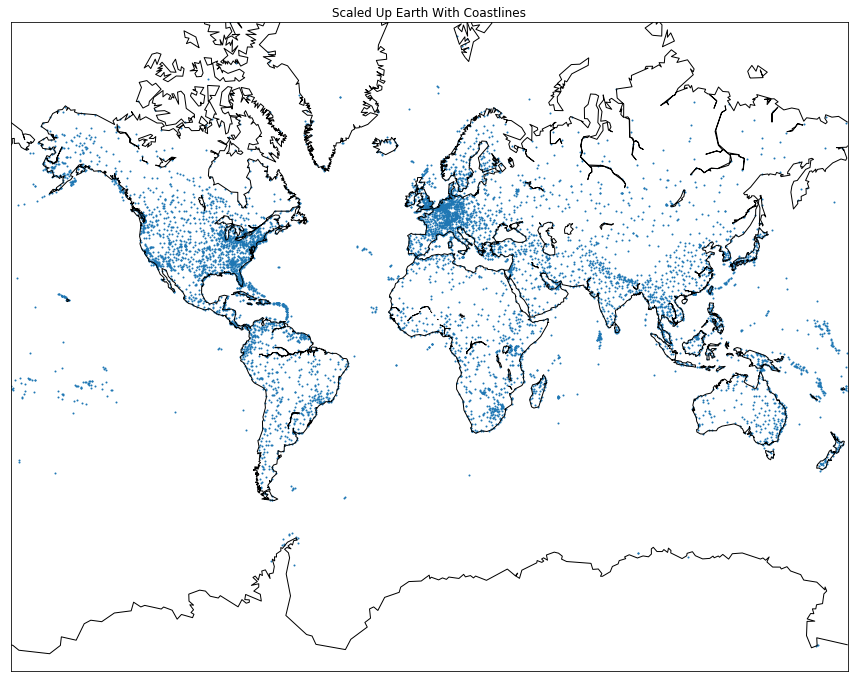

In [55]:
fig, ax = plt.subplots(figsize=(15, 20)) #Creating figure with higher scale
plt.title("Scaled Up Earth With Coastlines") #or ax.set_title()
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180)
longitude = airports["longitude"].tolist()
latitude = airports["latitude"].tolist()
x, y = m(longitude, latitude)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

## Creating route connections

In [57]:
geo_routes = pd.read_csv("geo_routes.csv")
geo_routes.info()
geo_routes.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


In [ ]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
def create_great_circles(parameter):
    for index,row in parameter.iterrows():
        end_lat, start_lat = row["end_lat"], row["start_lat"]
        end_lon, start_lon = row["end_lon"], row["start_lon"]
        if abs(end_lat - start_lat) < 180 and abs(end_lon - start_lon)< 180:
            m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)
dfw = geo_routes[geo_routes["source"] == "DFW"]
create_great_circles(dfw)
plt.show()